## Compare between different classification algorithms:
1. **Logistic Regression**
2. **Random Forest**
3. **Support Vector Machine**
4. **K-Nearest Neighbors**
5. **Neural Network**

In [1]:
# GENERAL LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the data and data overview

In [2]:
raw_data = pd.read_csv('classification.csv')
df = raw_data.copy()
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [3]:
# Summary table
df.describe()

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


From the summary table, we can note:
* We don't have null values (all counts are 297)
* Success samples are balanced (0.57)
* Ranges of age and interest variables

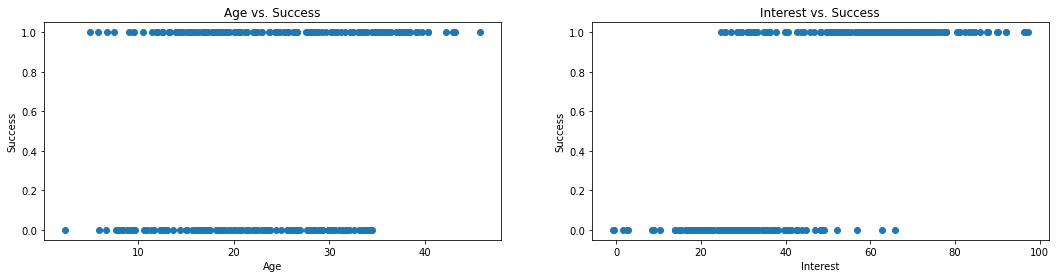

In [4]:
# Visualization of age and interest vs success
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,4))
# age vs success
ax[0].scatter(df['age'], df['success'])
ax[0].set_title('Age vs. Success')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Success')
# interest vs success
ax[1].scatter(df['interest'], df['success'])
ax[1].set_title('Interest vs. Success')
ax[1].set_xlabel('Interest')
ax[1].set_ylabel('Success')
# Show plot
plt.show()

### Data Preprocessing

In [5]:
# Checkpoint 1
unsplitted_data = df.copy()
inputs = unsplitted_data.drop('success', axis = 1)
targets = unsplitted_data['success']

**Splitting data into train and test**

In [6]:
# Splitting data library
from sklearn.model_selection import train_test_split

In [7]:
x_train_unscaled, x_test_unscaled, y_train, y_test = train_test_split(inputs, targets, train_size = 0.8, shuffle = True,
                                                                     random_state = 42)
x_train_unscaled = x_train_unscaled.reset_index(drop = True)
x_test_unscaled = x_test_unscaled.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

print("X-train shape {}, X-test shape {}, Y-train shape {}, Y-test shape {}".format(x_train_unscaled.shape, 
                                                                                    x_test_unscaled.shape,
                                                                                    y_train.shape, y_test.shape))

X-train shape (237, 2), X-test shape (60, 2), Y-train shape (237,), Y-test shape (60,)


**Standardize data**

In [8]:
# Scaling library
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(x_train_unscaled)
x_train_scaled = scaler.transform(x_train_unscaled)
x_test_scaled = scaler.transform(x_test_unscaled)
print("X-train shape {}, X-test shape {}".format(x_train_scaled.shape, x_test_scaled.shape))

X-train shape (237, 2), X-test shape (60, 2)


## 1. Logistic Regression

In [10]:
# Libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

**Fitting the model**

In [11]:
log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [12]:
bias_weights = [np.round(log_model.intercept_[0],4), np.round(log_model.coef_[0,0],4), np.round(log_model.coef_[0,1],4)]
col_names = inputs.columns.values.tolist()
col_names = ["Bias"] + col_names
log_model_summary = pd.DataFrame(data = bias_weights, index = col_names, columns = ["Weights"])
log_model_summary

,Weights
Bias,0.5549
age,0.5457
interest,2.8298


In [13]:
log_model.score(x_train_scaled, y_train)

0.8734177215189873

**Accuracy for train and test sets**

In [14]:
log_model_train_accuracy = round(log_model.score(x_train_scaled, y_train),4)
log_model_test_accuracy = round(log_model.score(x_test_scaled, y_test),4)
print("Train accuracy: {} \nTest accuracy: {}".format(log_model_train_accuracy, log_model_test_accuracy))

Train accuracy: 0.8734 
Test accuracy: 0.9167


## 2. Random Forest

In [15]:
# Libraries
from sklearn.ensemble import RandomForestClassifier

**Fitting the model**

In [16]:
rand_for = RandomForestClassifier()
rand_for.fit(x_train_unscaled, y_train)

RandomForestClassifier()

In [17]:
features = x_train_unscaled.columns.values.tolist()
rand_for_summary = pd.DataFrame(rand_for.feature_importances_, index = features, columns = ['Importance'])
rand_for_summary

,Importance
age,0.287221
interest,0.712779


**Accuracy for train and test sets**

In [18]:
rand_for_train_accuracy = round(rand_for.score(x_train_unscaled, y_train),4)
rand_for_test_accuracy = round(rand_for.score(x_test_unscaled, y_test),4)
print("Train accuracy: {} \nTest accuracy: {}".format(rand_for_train_accuracy, rand_for_test_accuracy))

Train accuracy: 1.0 
Test accuracy: 0.9833


## 3. Support Vector Machine

In [19]:
# Libraries
from sklearn.svm import SVC

**Fitting the model**

In [20]:
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)

SVC()

**Accuracy for train and test sets**

In [21]:
svm_model_train_accuracy = round(svm_model.score(x_train_scaled, y_train),4)
svm_model_test_accuracy = round(svm_model.score(x_test_scaled, y_test),4)
print("Train accuracy: {} \nTest accuracy: {}".format(svm_model_train_accuracy, svm_model_test_accuracy))

Train accuracy: 0.9494 
Test accuracy: 0.9833


## 4. K-Nearest Neighbors

In [22]:
# Libraries
from sklearn.neighbors import KNeighborsClassifier

**Fitting the Model**

In [23]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

**Accuracy for train and test sets**

In [24]:
knn_model_train_accuracy = round(knn_model.score(x_train_scaled, y_train), 4)
knn_model_test_accuracy = round(knn_model.score(x_test_scaled, y_test), 4)
print("Train accuracy: {} \nTest accuracy: {}".format(knn_model_train_accuracy, knn_model_test_accuracy))

Train accuracy: 0.9578 
Test accuracy: 0.9833


## 5. Neural Network

In [25]:
# Libraries
import tensorflow as tf

In [26]:
# Separate a validation set from training set
train_inputs, validation_inputs, train_targets, validation_targets = train_test_split(x_train_scaled, y_train, 
                                                                                      train_size = 0.8, 
                                                                                      shuffle = True, random_state = 42)
train_inputs = tf.convert_to_tensor(train_inputs)
validation_inputs = tf.convert_to_tensor(validation_inputs)
train_targets = tf.convert_to_tensor(train_targets)
validation_targets = tf.convert_to_tensor(validation_targets)

**Fitting the model**

In [27]:
input_size = 2
output_size = 2
hidden_layer_size = 300

NN_model = tf.keras.Sequential([
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(output_size, activation = 'softmax')
                               ])

NN_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

batch_size = 100
max_epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2) 

NN_model.fit(train_inputs, train_targets,
         #batch_size = batch_size,
         epochs = max_epochs,
         callbacks = [early_stopping],
         validation_data = (validation_inputs, validation_targets),
         verbose = 2)

Epoch 1/50
6/6 - 2s - loss: 0.5699 - accuracy: 0.7619 - val_loss: 0.4138 - val_accuracy: 0.8542 - 2s/epoch - 414ms/step
Epoch 2/50
6/6 - 0s - loss: 0.3809 - accuracy: 0.8889 - val_loss: 0.3149 - val_accuracy: 0.8958 - 51ms/epoch - 9ms/step
Epoch 3/50
6/6 - 0s - loss: 0.2967 - accuracy: 0.8995 - val_loss: 0.3000 - val_accuracy: 0.8750 - 36ms/epoch - 6ms/step
Epoch 4/50
6/6 - 0s - loss: 0.2644 - accuracy: 0.8942 - val_loss: 0.3126 - val_accuracy: 0.8958 - 34ms/epoch - 6ms/step
Epoch 5/50
6/6 - 0s - loss: 0.2592 - accuracy: 0.8995 - val_loss: 0.3169 - val_accuracy: 0.8958 - 35ms/epoch - 6ms/step


**Accuracy for train and test sets**

In [28]:
NN_model_train_accuracy = round(NN_model.evaluate(x_train_scaled, y_train)[1],4)
NN_model_test_accuracy = round(NN_model.evaluate(x_test_scaled, y_test)[1],4)
print("Train accuracy: {} \nTest accuracy: {}".format(NN_model_train_accuracy, NN_model_test_accuracy))

2/2 [==============================] - 0s 2ms/step - loss: 0.1017 - accuracy: 0.9833
Train accuracy: 0.9072 
Test accuracy: 0.9833


## Summary

In [29]:
accuracy_values = {'Train Accuracy':[log_model_train_accuracy, rand_for_train_accuracy, svm_model_train_accuracy, 
                         knn_model_train_accuracy, NN_model_train_accuracy], 
                   'Test Accuracy': [log_model_test_accuracy, rand_for_test_accuracy, svm_model_test_accuracy, 
                         knn_model_test_accuracy, NN_model_test_accuracy]}
index_values = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'Neural Network']
summary_accuracy = pd.DataFrame(accuracy_values, index = index_values)
summary_accuracy = summary_accuracy.sort_values(by = 'Test Accuracy', ascending = False)
summary_accuracy

,Train Accuracy,Test Accuracy
Random Forest,1.0000,0.9833
Support Vector Machine,0.9494,0.9833
K-Nearest Neighbors,0.9578,0.9833
Neural Network,0.9072,0.9833
Logistic Regression,0.8734,0.9167
